In [20]:
# Aufgabe 1: Nobelpreis. Youngest/Oldest Nobel Price Winner.
# Aufgabe 2: Berechnen - Wahrscheinlichkeit des jüngsten Nobelpreisgewinners. Statistische Charakteristik Alter. Covarianz Iristypen.

In [21]:
# Aufgabe 1:

In [22]:
# import section
import matplotlib.pyplot as plot
import seaborn as s
import numpy as n
import pandas as p
from datetime import datetime, date
import statistics
from scipy.stats import poisson
    
# Set default
s.set()

# load CSV
nobelpr = p.read_csv('nobelpr.csv', sep = ',')
    
# print CSV
nobelpr

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [23]:
# Check Data Quality for Winner Information
nullFields = nobelpr.isnull().sum()
nullFields

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

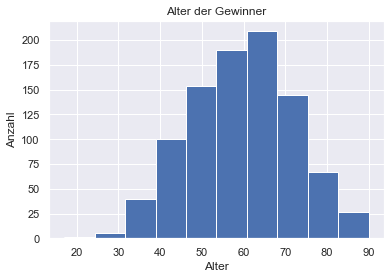

In [24]:
# DataFrame
df = p.DataFrame(nobelpr)

# Age Calculation
# With Help from Students: coerce
df['Age'] = p.to_datetime(df['Year'], format = '%Y').dt.year - p.to_datetime(df['Birth Date'], errors='coerce').dt.year

# Create Plot
plot.title('Alter der Gewinner')
plot.xlabel('Alter')
plot.ylabel('Anzahl')
plot.hist(df['Age'])

# Load Plot
plot.show()

In [25]:
# Only needed Information
dfShort = df[['Full Name', 'Sex', 'Age']]
print(dfShort)

                        Full Name   Sex   Age
0    Jacobus Henricus van 't Hoff  Male  49.0
1                 Sully Prudhomme  Male  62.0
2          Emil Adolf von Behring  Male  47.0
3               Jean Henry Dunant  Male  73.0
4                  Frédéric Passy  Male  79.0
..                            ...   ...   ...
964              Yoshinori Ohsumi  Male  71.0
965            Juan Manuel Santos  Male  65.0
966             David J. Thouless  Male  82.0
967          F. Duncan M. Haldane  Male  65.0
968         J. Michael Kosterlitz  Male  73.0

[969 rows x 3 columns]


In [26]:
# Youngest Winner
youngest = dfShort['Age'].min()
print(youngest)
dfShort[dfShort.isin([dfShort['Age'].min()]).any(axis = 1)]

## Oldest Winner
#print(dfShort['Age'].max())
#dfShort[dfShort.isin([dfShort['Age'].max()]).any(axis = 1)]

17.0


,Full Name,Sex,Age
940,Malala Yousafzai,Female,17.0


In [27]:
# Can't put it into the same Code Block as Youngest Winner? Does not show both outputs
# Oldest Winner
print(dfShort['Age'].max())
dfShort[dfShort.isin([dfShort['Age'].max()]).any(axis = 1)]

90.0


,Full Name,Sex,Age
825,Leonid Hurwicz,Male,90.0


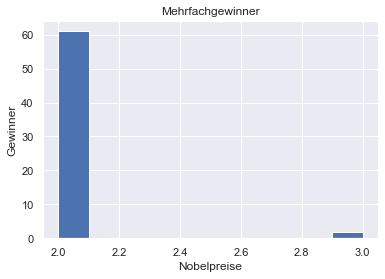

In [28]:
# Show repeated Winner 
repWinner = df[df.duplicated(['Full Name'], keep = False)]

# Table
repTable = repWinner.pivot_table(index = ['Full Name'], aggfunc = 'size')
repTable

# Create Plot
plot.title('Mehrfachgewinner')
plot.xlabel('Nobelpreise')
plot.ylabel('Gewinner')
plot.hist(repTable)

# Load Plot
plot.show()

In [29]:
# Aufgabe 2:

In [30]:
# Statistische Charakteristiken bezogen aufs Alter

# Mean
mean = n.mean(dfShort['Age'])
print('Mean: ', mean)

# Median
print('Median: ', statistics.median(dfShort['Age']))

# Percentile
print('Perscentile 0.0: ', dfShort['Age'].quantile(0.0))
print('Perscentile 0.025: ', dfShort['Age'].quantile(0.025))
print('Perscentile 0.050: ', dfShort['Age'].quantile(0.050))
print('Perscentile 0.1: ', dfShort['Age'].quantile(0.1))
print('Perscentile 0.2: ', dfShort['Age'].quantile(0.2))
print('Perscentile 0.4: ', dfShort['Age'].quantile(0.4))
print('Perscentile 0.5: ', dfShort['Age'].quantile(0.5))
print('Perscentile 0.75: ', dfShort['Age'].quantile(0.75))
print('Perscentile 0.975: ', dfShort['Age'].quantile(0.975))
print('Perscentile 1: ', dfShort['Age'].quantile(1))

# For Poison
p0025 = dfShort['Age'].quantile(0.025)
p005 = dfShort['Age'].quantile(0.05)
p01 = dfShort['Age'].quantile(0.1)
p02 = dfShort['Age'].quantile(0.2)
p04 = dfShort['Age'].quantile(0.4)
p05 = dfShort['Age'].quantile(0.5)
p075 = dfShort['Age'].quantile(0.75)
p0975 = dfShort['Age'].quantile(0.975)

# Standardabweichung
print('Standardabweichung: ', n.std(dfShort['Age']))

# Varianz
print('Varianz: ', n.var(dfShort['Age']))

Mean:  59.48400852878465
Median:  62.0
Perscentile 0.0:  17.0
Perscentile 0.025:  36.0
Perscentile 0.050:  39.0
Perscentile 0.1:  43.0
Perscentile 0.2:  48.0
Perscentile 0.4:  56.0
Perscentile 0.5:  60.0
Perscentile 0.75:  69.0
Perscentile 0.975:  83.0
Perscentile 1:  90.0
Standardabweichung:  12.370620852015454
Varianz:  153.03226026431955


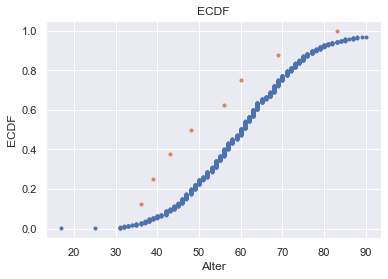

In [31]:
# Poison Verteilung
# youngest und mean schon gesetzt
poisson.cdf(k = youngest, mu = mean)

# ecdf
def ecdf(dfShort):
    z = len(dfShort)
    x = n.sort(dfShort)
    y = n.arange(1, z + 1)/z
    return x, y

# Draw percentiles
percentiles = [p0025, p005, p01, p02, p04, p05, p075, p0975]
x, y = ecdf(percentiles)

# Draw ecdf
xv, yv = ecdf(dfShort['Age'])

# Create Plot
plot.title('ECDF')
plot.xlabel('Alter')
plot.ylabel('ECDF')
plot.plot(xv, yv, '.')
plot.plot(x, y, '.')

# Load Plot
plot.show()

In [32]:
# Wahrscheinlichkeit mit Poison
print('Wahrscheinlichkeit für jüngeren Gewinner: ', poisson.cdf(k = youngest, mu = mean))

Wahrscheinlichkeit für jüngeren Gewinner:  8.365697170223821e-11
